# Introduction
* Phan tich cac yeu to anh huong den Attrition rate va satisfaction rate tu bang du lieu HR cua IBM
* Yeu cau:
    - Ket luan va tra loi 2 cau hoi:
    - 1. What are key factors that are playing into current attrition rates?
    - 2. What are key factors that are playing into current satisfaction rates? (chon JobSatisfaction)
* Cac noi dung duoc trinh bay ben duoi gom:
    - Look at data
    - Kiem tra missing value
    - Missing value treatments
    - Descriptive statistic
    - Exploratory Data Analysis
    - Hypothesis testing (trong bai tap nay gia su cac feature deu co phan phoi chuan de thuc hien testing)
    - Conclusions and answer questions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Look at the data

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.shape

(1470, 35)

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Kiem tra missing value

In [4]:
pd.DataFrame(data.isnull().sum(),columns=['Null Values Present'])

,Null Values Present
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


# Missing value treatments

# Descriptive statistic

In [5]:
data.describe(percentiles = [.1,.25,.5,.75,.95,.99])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
10%,26.000000,242.800000,1.000000,1.000000,1.0,198.900000,1.000000,38.000000,2.000000,1.000000,...,1.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
95%,54.000000,1424.100000,26.000000,4.000000,1.0,1967.550000,4.000000,97.000000,4.000000,4.000000,...,4.000000,80.0,3.000000,28.000000,5.000000,4.000000,20.000000,11.000000,9.000000,10.000000
99%,58.310000,1485.000000,29.000000,5.000000,1.0,2046.620000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,35.000000,6.000000,4.000000,31.000000,15.000000,14.000000,14.000000


In [6]:
data.Attrition.describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

In [7]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
data.JobSatisfaction.describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

In [9]:
data.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- chon 5 feature de khao sat su anh huong cua no den Attrition rate: Age, DistanceFromHome, MonthlyIncome, Gender, OverTime  
- chon 5 feature de khao sat su anh huong cua no den JobSatisfaction rate: Age, MonthlyIncome, HourlyRate, PercentSalaryHike, YearsInCurrentRole 
- Trong do:
    + Age: Age of the employee in numeric.
    + Attrition: Attrition of employee categorical : Yes/ No
    + DistanceFromHome: It is a numerical column signify total distance of employee's home from office
    + MonthlyIncome: It is a numerical column signify monthly income of the employee.
    + Gender: It is a categorical column having only 2 values Male and female.
    + OverTime: It is a categorical column signify whether employee work overtime or not: Yes/ No
    + HourlyRate: It is a numerical column signify hourly working rate of employee.
    + PercentSalaryHike: It is a numerical column signify percentage of hike received recently by an employee.
    + JobSatisfaction: It signifies how satisfied an employee is with the job : (1 'Low',2 'Medium',3 'High',4 'Very High'). It is a categorical column

# Exploratory Data Analysis

* ATTRITION RATE

([<matplotlib.patches.Wedge at 0x150266a4ef0>,
 [Text(0.9618916732177653, 0.5336332157899545, 'Attrition_Yes'),
  Text(-0.9618916732177653, -0.5336332157899545, 'Attrition_No')],
 [Text(0.5246681853915083, 0.29107266315815694, '16.1%'),
  Text(-0.5246681853915083, -0.29107266315815694, '83.9%')])

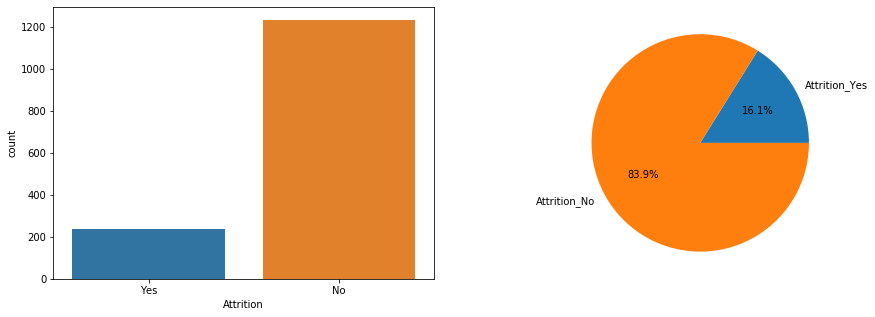

In [11]:
attr_y = data[data['Attrition']=='Yes']
attr_n = data[data['Attrition']=='No']
factor_to_attr = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'Gender', 'OverTime']
sizes = [data['Attrition'].value_counts()[1], data['Attrition'].value_counts()[0]]
labels = ['Attrition_Yes', 'Attrition_No']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data['Attrition'])
plt.subplot(1,2,2)
plt.pie(sizes,labels = labels, autopct='%1.1f%%')

Tu bieu do ta thay tai Cty IBM ti le nguoi attrition_yes (16.1%) thap hon nhieu so voi nhom nguoi attrition_no (83.9%)

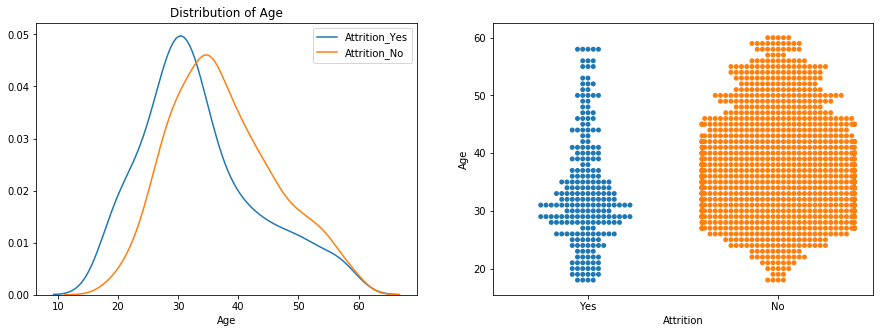

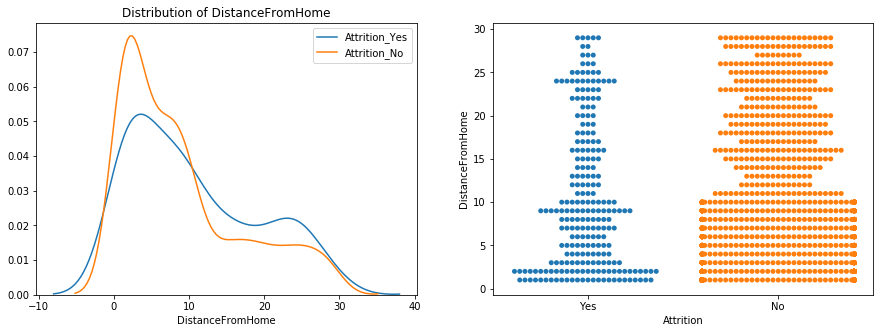

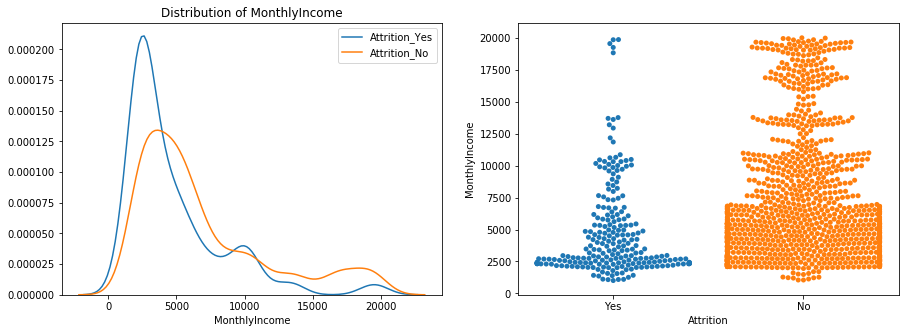

In [12]:
# Age
for i in factor_to_attr[:3]:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(attr_y[i],label = "Attrition_Yes",hist=False)
    sns.distplot(attr_n[i],label = "Attrition_No",hist=False)
    plt.title('Distribution of ' + i)
    plt.subplot(1,2,2)
    sns.swarmplot(x="Attrition", y=i, data=data)

Qua cac bieu do tren ta thay:
- ti le attrition_yes cao tap trung o do tuoi khoang tu 27-32. Tuoi cang thap ti le attrition_yes cang cao 
- Khoang cach cang gan (0-10) thi ti le attrition_no cang cao va nguoc lai khi khoang cach cang xa thi ti le attrition_yes co xu huong cao hon attrition_no
- thu nhap cang thap (khoang 2500-3000) thi ti le attrition_yes cang cao

Text(0.5, 1.0, 'Attrition percentage of male')

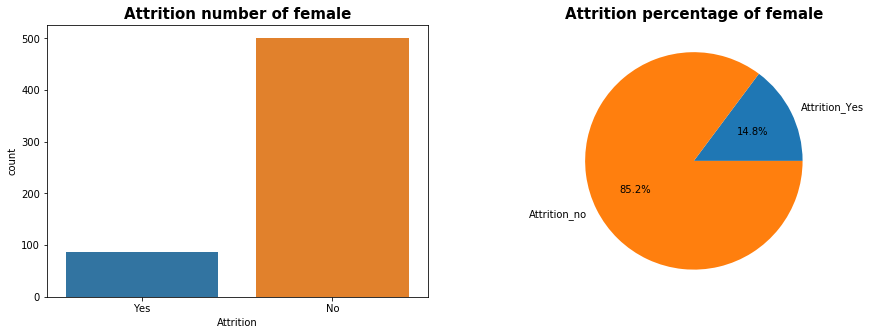

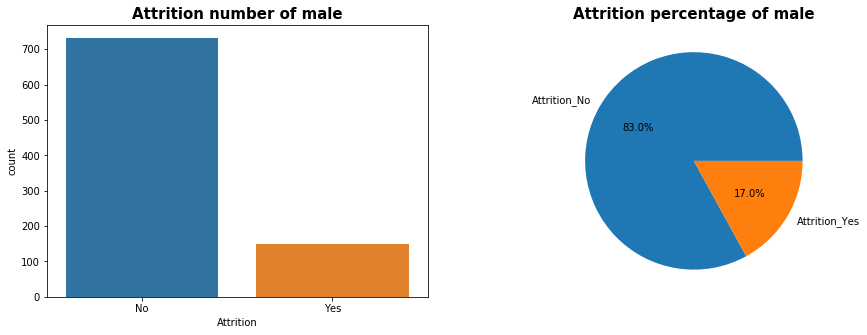

In [13]:
#Gender
female = data[data['Gender']== 'Female']
male = data[data['Gender'] == 'Male']
# female
fig = plt.figure(figsize=(15,5))
sizes = [female['Attrition'].value_counts()[1], female['Attrition'].value_counts()[0]]
labels = ['Attrition_Yes', 'Attrition_no']
plt.subplot(1,2,1)
sns.countplot(female['Attrition'])
plt.title('Attrition number of female', fontsize=15, weight='bold')
plt.subplot(1,2,2)
plt.pie(sizes,labels = labels, autopct='%1.1f%%')
plt.title('Attrition percentage of female', fontsize=15, weight='bold')

# male
fig = plt.figure(figsize=(15,5))
sizes = [male['Attrition'].value_counts()[0], male['Attrition'].value_counts()[1]]
labels = ['Attrition_No', 'Attrition_Yes']
plt.subplot(1,2,1)
sns.countplot(male['Attrition'])
plt.title('Attrition number of male', fontsize=15, weight='bold')
plt.subplot(1,2,2)
plt.pie(sizes,labels = labels, autopct='%1.1f%%')
plt.title('Attrition percentage of male', fontsize=15, weight='bold')

- Tu bieu do ta thay giua nam va nu co ti le attrition_yes gan bang nhau

Text(0.5, 1.0, 'Attrition percentage of no_over_time')

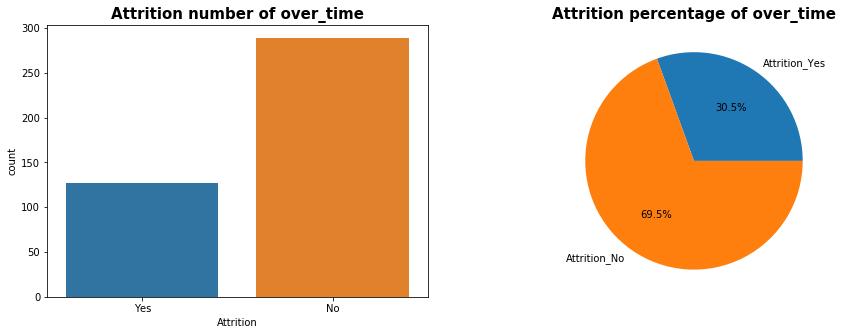

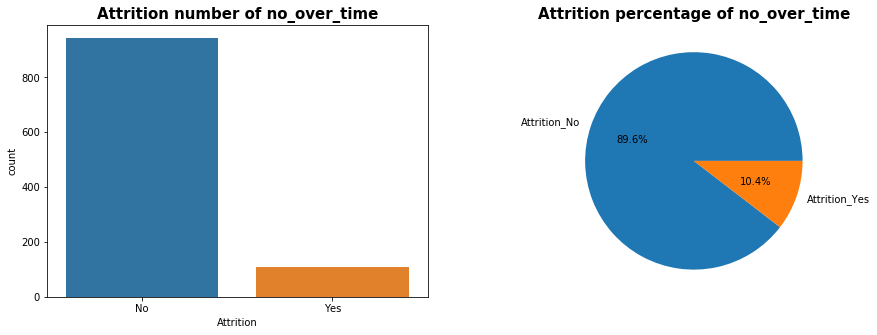

In [14]:
#overtime
over_time = data[data['OverTime']=='Yes']
no_over_time = data[data['OverTime']=='No']
# yes overtime
fig = plt.figure(figsize=(15,5))
sizes = [over_time['Attrition'].value_counts()[1], over_time['Attrition'].value_counts()[0]]
labels = ['Attrition_Yes', 'Attrition_No']
plt.subplot(1,2,1)
sns.countplot(over_time['Attrition'])
plt.title('Attrition number of over_time', fontsize=15, weight='bold')
plt.subplot(1,2,2)
plt.pie(sizes,labels = labels, autopct='%1.1f%%')
plt.title('Attrition percentage of over_time', fontsize=15, weight='bold')

#no overtime
fig = plt.figure(figsize=(15,5))
sizes = [no_over_time['Attrition'].value_counts()[0], no_over_time['Attrition'].value_counts()[1]]
labels = ['Attrition_No', 'Attrition_Yes']
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(no_over_time['Attrition'])
plt.title('Attrition number of no_over_time', fontsize=15, weight='bold')
ax1 = plt.subplot2grid((1,2),(0,1))
ax1.pie(sizes,labels = labels, autopct='%1.1f%%')
plt.title('Attrition percentage of no_over_time', fontsize=15, weight='bold')

- Tu bieu do ta thay nhung nguoi hay overtime co ti le attrition_yes cao hon so voi no overtime

=========================================================================================

* JOBSATISFACTION RATE

([<matplotlib.patches.Wedge at 0x150274e0630>,
 [Text(0.896776745904328, 0.6370176355527721, 'low'),
  Text(-0.28583613726780854, 1.062213586164204, 'medium'),
  Text(-1.0697439553566308, -0.2562184028869727, 'high'),
  Text(0.6118600748921175, -0.9141264949409423, 'veryhigh')],
 [Text(0.48915095231145156, 0.34746416484696657, '19.7%'),
  Text(-0.15591062032789557, 0.5793892288168384, '19.0%'),
  Text(-0.5834967029217986, -0.13975549248380326, '30.1%'),
  Text(0.33374185903206405, -0.49861445178596847, '31.2%')])

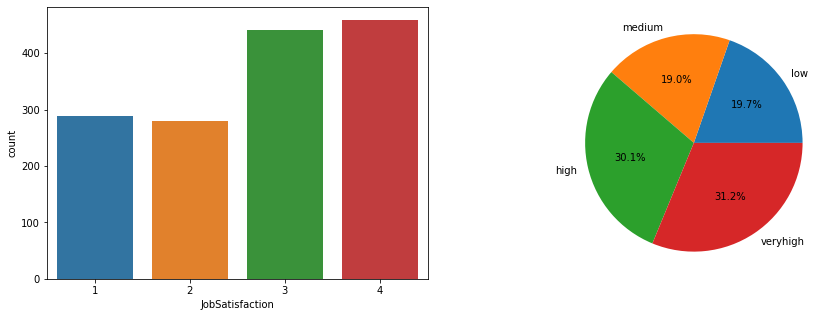

In [15]:
veryhigh_sat = data[data['JobSatisfaction']==4]
high_sat = data[data['JobSatisfaction']==3]
med_sat = data[data['JobSatisfaction']==2]
low_sat = data[data['JobSatisfaction']==1]
sizes = [data['JobSatisfaction'].value_counts()[1], data['JobSatisfaction'].value_counts()[2],
         data['JobSatisfaction'].value_counts()[3], data['JobSatisfaction'].value_counts()[4]]
labels = ['low','medium','high','veryhigh']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data['JobSatisfaction'])
plt.subplot(1,2,2)
plt.pie(sizes,labels=labels, autopct='%1.1f%%')

Tu cac bieu do ta thay rat nhieu nguoi hai long trong cong viec voi, chiem hon nua so nhan vien: voi muc do veryhigh: 31.2% va high: 30.1%

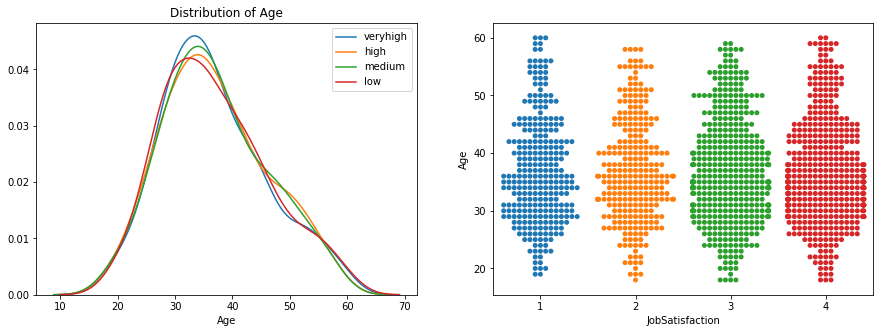

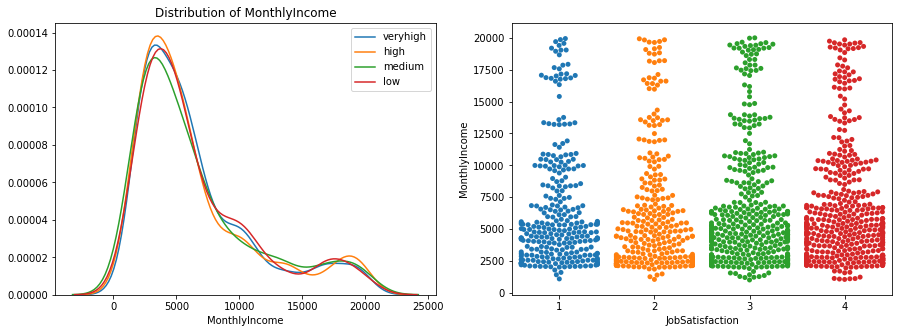

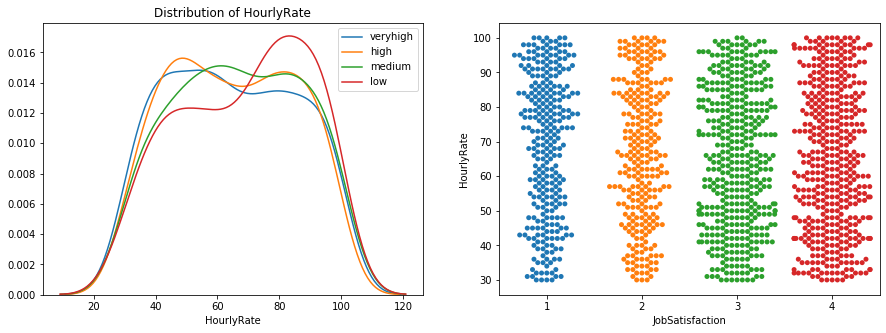

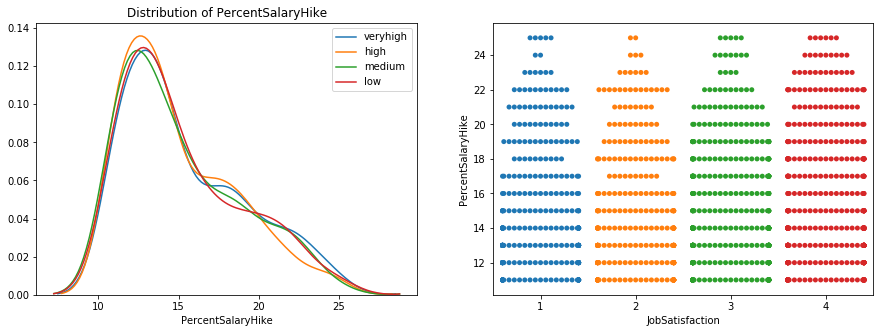

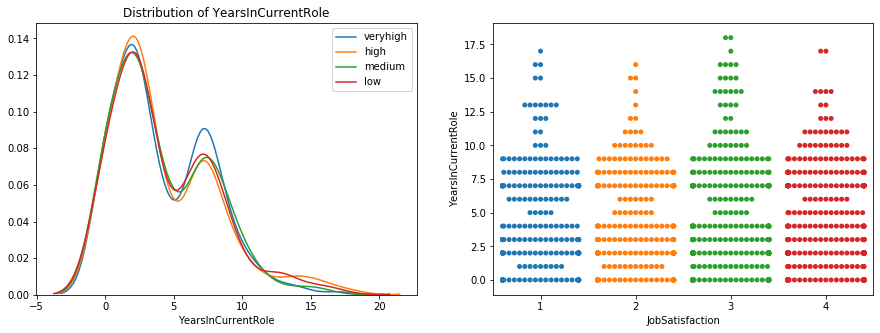

In [16]:
# Ve bieu bo phan phoi cua cac yeu to co the anh huong den JobSatisfaction
factor_to_jobsat = ['Age','MonthlyIncome','HourlyRate', 'PercentSalaryHike', 'YearsInCurrentRole']  
for i in factor_to_jobsat: 
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(veryhigh_sat[i],label='veryhigh', hist=False)
    sns.distplot(high_sat[i],label='high',hist=False)
    sns.distplot(med_sat[i],label='medium',hist=False)
    sns.distplot(low_sat[i],label='low',hist=False)
    plt.title('Distribution of '+i)
    plt.subplot(1,2,2)
    sns.swarmplot(x="JobSatisfaction", y=i, data=data)

Qua cac bieu do ta thay:
- Tai tung do tuoi deu co ti le nguoi tuong ung voi cac muc do hai long gan nhu nhau
- Tuong tu thu nhap hang thang duong nhu khong anh huong den cac muc do hai long
- Mat khac duong nhu ti le gio lam viec cang cao (>80) thi muc do hai long cang thap
- Ben canh do, ti le phan tram tang luong khong anh huong den cac muc do hai long
- Cuoi cung, so nam lam viec voi vai tro hien tai cung gan nhu khong anh huong cac muc do hai long. Tuy nhien, khi lam viec voi vai tro hien tai tu 5 - 10 nam, nhieu nguoi rat hai long trong cong viec

# Hypothesis testing

* ATTRITION RATE: testing cac factor co anh huong den ti le attrition rate hay khong

In [17]:
data['Attrition'] = data['Attrition'].apply(lambda x: 0 if x=='No' else 1)
# factor_to_attr = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'Gender', 'OverTime']

In [18]:
# gia su H0: Khong co su khac nhau ve 'Age', 'DistanceFromHome', 'MonthlyIncome' giua nhom nguoi attrition_yes va attrition_no
for i in factor_to_attr[:3]:
    t,p = ttest_ind(attr_y[i] ,attr_n[i])
    if p > 0.05:
        print('- Accept H0 ' + i +' khong phai la key factor cua Attrition rate')
    else:
        print('- Reject H0 ' + i +' la key factor cua Attrition rate')
        if t > 0:
            print(i +' cua nhom nguoi attrition_yes lon hon nhom attrition_no')
        else:
            print(i +' cua nhom nguoi attrition_yes nho hon nhom attrition_no')

- Reject H0 Age la key factor cua Attrition rate
Age cua nhom nguoi attrition_yes nho hon nhom attrition_no
- Reject H0 DistanceFromHome la key factor cua Attrition rate
DistanceFromHome cua nhom nguoi attrition_yes lon hon nhom attrition_no
- Reject H0 MonthlyIncome la key factor cua Attrition rate
MonthlyIncome cua nhom nguoi attrition_yes nho hon nhom attrition_no


In [19]:
#gia thiet H0: nhom nu co ti le attrition giong voi nhom nam
ttest_ind(data[data['Gender']=='Female']['Attrition'], data[data['Gender']=='Male']['Attrition'])

Ttest_indResult(statistic=-1.1289761152328313, pvalue=0.25909236414147996)

- ket luan: p>0.05 nen chap nhan H0
- Gender khong phai la key factor cua Attrition rate

In [20]:
#gia thiet H0: nhom nguoi overtime co ti le attrition giong nhom no overtime
ttest_ind(data[data['OverTime']=='Yes']['Attrition'], data[data['OverTime']=='No']['Attrition'])

Ttest_indResult(statistic=9.729155002966676, pvalue=1.0092540336563068e-21)

- ket luan: p<0.05 nen reject H0, va t>0 nen nhom nguoi overtime co ti le attrition lon nguoi nhom nguoi no overtime
- OverTime la key factor cua Attrition rate 

1. Vay cac key fator cua ATTRITION RATE la Age, DistanceFromHome, MonthlyIncome, OverTime 

=============================================================================================

- JOBSATISFACTION RATE: testing cac factor co anh huong den ti le JobStatisfaction rate hay khong

In [21]:
# factor_to_jobsat = ['Age','MonthlyIncome','HourlyRate', 'PercentSalaryHike', 'YearsInCurrentRole'] 
# Gia thiet H0: khong co chenh lech ve 'Age','MonthlyIncome','HourlyRate', 'PercentSalaryHike', 'YearsInCurrentRole'
# trong cac muc do hai long
for i in factor_to_jobsat:
    f, p = f_oneway(veryhigh_sat[i],high_sat[i],med_sat[i],low_sat[i])
    if p > 0.05:
        print('Accept H0, ' + i + ' khong phai la Key factor cua JobSatisfaction')
    else:
        print('Reject H0, ' + i + ' la Key factor cua JobSatisfaction')

Accept H0, Age khong phai la Key factor cua JobSatisfaction
Accept H0, MonthlyIncome khong phai la Key factor cua JobSatisfaction
Reject H0, HourlyRate la Key factor cua JobSatisfaction
Accept H0, PercentSalaryHike khong phai la Key factor cua JobSatisfaction
Accept H0, YearsInCurrentRole khong phai la Key factor cua JobSatisfaction


2. Cac key factors cua JOBSATISFACTION RATE la HourlyRate.